In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '69ce9af5-5126-469c-acc3-cfeb47601351',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-18T07:56:47.452Z', 'error_code': 0, 'error_message': None, 'elapsed': 40, 'credit_count': 1, 'notice': None, 'total_count': 9220}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10165, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [1]:
import pandas as pd

#Allows you to see all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#this normalizes the data and makes it pretty in the dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\shlom\AppData\Local\Temp\ipykernel_131268\2417637101.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934946e+07,1.934946e+07,False,NaN,1,None,None,None,2023-04-18T07:55:00.000Z,29793.300524,1.714967e+10,14.6492,0.310886,-0.293146,-1.164919,10.259618,25.795039,39.883326,5.764842e+11,45.5244,6.256593e+11,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
1,1027,Ethereum,ETH,ethereum,6736,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.193682e+08,1.193682e+08,False,NaN,2,None,None,None,2023-04-18T07:55:00.000Z,2103.146401,9.268996e+09,1.1864,0.009035,0.563240,9.304439,18.362159,26.828267,32.907942,2.510489e+11,19.8296,2.510489e+11,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
2,825,Tether,USDT,tether,51379,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.093181e+10,8.409174e+10,False,NaN,3,None,None,None,2023-04-18T07:55:00.000Z,1.000537,3.071124e+10,8.2861,0.012475,0.002535,-0.023960,-0.170321,0.032525,0.038335,8.097530e+10,6.3945,8.413692e+10,None,2023-04-18T07:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 07:56:53.948344
3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558654e+08,1.558654e+08,False,NaN,4,None,None,None,2023-04-18T07:55:00.000Z,344.987545,7.854754e+08,-26.2273,-0.143017,0.120088,3.995189,2.661096,11.693519,14.318510,5.377164e+10,4.2440,5.377164e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
4,3408,USD Coin,USDC,usd-coin,11846,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.164024e+10,3.164024e+10,False,NaN,5,None,None,None,2023-04-18T07:55:00.000Z,1.000176,4.077533e+09,-4.7802,0.014074,0.040739,0.029344,0.081182,0.022618,0.024700,3.164580e+10,2.4977,3.164580e+10,None,2023-04-18T07:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 07:56:53.948344
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,None,None,None,2023-04-18T07:55:00.000Z,0.516098,9.338610e+08,14.2634,0.123169,0.468150,-1.511898,35.537460,33.079222,32.771549,2.670847e+10,2.1096,5.160976e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.477892e+10,3.569462e+10,False,NaN,7,None,None,None,2023-04-18T07:55:00.000Z,0.442810,4.277863e+08,3.8978,-0.155358,0.699631,7.742419,30.142131,12.149028,26.211948,1.540045e+10,1.2162,1.992644e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
7,74,Dogecoin,DOGE,dogecoin,688,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.389858e+11,1.389858e+11,False,NaN,8,None,None,None,2023-04-18T07:55:00.000Z,0.092942,1.265252e+09,64.7325,-0.047935,0.892270,8.697730,25.382449,7.546644,6.722785,1.291768e+10,1.0199,1.291768e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
8,3890,Polygon,MATIC,polygon,659,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '69ce9af5-5126-469c-acc3-cfeb47601351',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df=df.append(df2)
    
    

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\shlom\AppData\Local\Temp\ipykernel_131268\1925746141.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\shlom\AppData\Local\Temp\ipykernel_131268\1925746141.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API Runner completed


C:\Users\shlom\AppData\Local\Temp\ipykernel_131268\1925746141.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\shlom\AppData\Local\Temp\ipykernel_131268\1925746141.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API Runner completed


C:\Users\shlom\AppData\Local\Temp\ipykernel_131268\1925746141.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\shlom\AppData\Local\Temp\ipykernel_131268\1925746141.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934946e+07,1.934946e+07,False,NaN,1,None,None,None,2023-04-18T07:55:00.000Z,29793.300524,1.714967e+10,14.6492,0.310886,-0.293146,-1.164919,10.259618,25.795039,39.883326,5.764842e+11,45.5244,6.256593e+11,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
1,1027,Ethereum,ETH,ethereum,6736,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.193682e+08,1.193682e+08,False,NaN,2,None,None,None,2023-04-18T07:55:00.000Z,2103.146401,9.268996e+09,1.1864,0.009035,0.563240,9.304439,18.362159,26.828267,32.907942,2.510489e+11,19.8296,2.510489e+11,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
2,825,Tether,USDT,tether,51379,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.093181e+10,8.409174e+10,False,NaN,3,None,None,None,2023-04-18T07:55:00.000Z,1.000537,3.071124e+10,8.2861,0.012475,0.002535,-0.023960,-0.170321,0.032525,0.038335,8.097530e+10,6.3945,8.413692e+10,None,2023-04-18T07:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 07:56:53.948344
3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558654e+08,1.558654e+08,False,NaN,4,None,None,None,2023-04-18T07:55:00.000Z,344.987545,7.854754e+08,-26.2273,-0.143017,0.120088,3.995189,2.661096,11.693519,14.318510,5.377164e+10,4.2440,5.377164e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
4,3408,USD Coin,USDC,usd-coin,11846,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.164024e+10,3.164024e+10,False,NaN,5,None,None,None,2023-04-18T07:55:00.000Z,1.000176,4.077533e+09,-4.7802,0.014074,0.040739,0.029344,0.081182,0.022618,0.024700,3.164580e+10,2.4977,3.164580e+10,None,2023-04-18T07:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 07:56:53.948344
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,None,None,None,2023-04-18T07:55:00.000Z,0.516098,9.338610e+08,14.2634,0.123169,0.468150,-1.511898,35.537460,33.079222,32.771549,2.670847e+10,2.1096,5.160976e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.477892e+10,3.569462e+10,False,NaN,7,None,None,None,2023-04-18T07:55:00.000Z,0.442810,4.277863e+08,3.8978,-0.155358,0.699631,7.742419,30.142131,12.149028,26.211948,1.540045e+10,1.2162,1.992644e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
7,74,Dogecoin,DOGE,dogecoin,688,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.389858e+11,1.389858e+11,False,NaN,8,None,None,None,2023-04-18T07:55:00.000Z,0.092942,1.265252e+09,64.7325,-0.047935,0.892270,8.697730,25.382449,7.546644,6.722785,1.291768e+10,1.0199,1.291768e+10,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
8,3890,Polygon,MATIC,polygon,659,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19349456.00000,19349456.00000,False,NaN,1,None,None,None,2023-04-18T07:55:00.000Z,29793.30052,17149673581.88447,14.64920,0.31089,-0.29315,-1.16492,10.25962,25.79504,39.88333,576484157587.20337,45.52440,625659311007.56995,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
1,1027,Ethereum,ETH,ethereum,6736,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,119368246.22832,119368246.22832,False,NaN,2,None,None,None,2023-04-18T07:55:00.000Z,2103.14640,9268995575.15968,1.18640,0.00903,0.56324,9.30444,18.36216,26.82827,32.90794,251048897397.72733,19.82960,251048897397.73001,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
2,825,Tether,USDT,tether,51379,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80931811951.65373,84091735571.80334,False,NaN,3,None,None,None,2023-04-18T07:55:00.000Z,1.00054,30711235790.31101,8.28610,0.01247,0.00254,-0.02396,-0.17032,0.03253,0.03834,80975302659.00299,6.39450,84136924342.13000,None,2023-04-18T07:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 07:56:53.948344
3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865445.64211,155865445.64211,False,NaN,4,None,None,None,2023-04-18T07:55:00.000Z,344.98755,785475382.67782,-26.22730,-0.14302,0.12009,3.99519,2.66110,11.69352,14.31851,53771637459.36668,4.24400,53771637459.37000,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
4,3408,USD Coin,USDC,usd-coin,11846,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31640240578.28292,31640240578.28292,False,NaN,5,None,None,None,2023-04-18T07:55:00.000Z,1.00018,4077533219.37029,-4.78020,0.01407,0.04074,0.02934,0.08118,0.02262,0.02470,31645797969.10974,2.49770,31645797969.11000,None,2023-04-18T07:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 07:56:53.948344
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,None,None,None,2023-04-18T07:55:00.000Z,0.51610,933861004.41471,14.26340,0.12317,0.46815,-1.51190,35.53746,33.07922,32.77155,26708471462.12417,2.10960,51609764691.68000,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34778921397.44900,35694617077.12100,False,NaN,7,None,None,None,2023-04-18T07:55:00.000Z,0.44281,427786295.44325,3.89780,-0.15536,0.69963,7.74242,30.14213,12.14903,26.21195,15400448710.05272,1.21620,19926442917.32000,None,2023-04-18T07:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 07:56:53.948344
7,74,Dogecoin,DOGE,dogecoin,688,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138985756383.70523,138985756383.70523,False,NaN,8,None,None,None,2023-04-18T07:55:00.000Z,0.09294,1265251593.70917,64.73250,-0.04793,0.89227,8.69773,25.38245,7.54664,6.72278,12917678733.17289,1.01990,12917678733.17000,None,2023-04-18T07:55:00.

In [5]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

NameError: name 'df' is not defined

In [4]:
df4=df3.stack()
df4

NameError: name 'df3' is not defined

In [12]:
type(df3)

pandas.core.frame.DataFrame

In [13]:
type(df4)

pandas.core.series.Series

In [3]:
df5=df4.to_frame(name='values')
df5

NameError: name 'df4' is not defined

In [20]:
df5.count()

values    90
dtype: int64

In [23]:
index = pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.31535
1,Bitcoin,quote.USD.percent_change_24h,-0.26977
2,Bitcoin,quote.USD.percent_change_7d,-1.14537
3,Bitcoin,quote.USD.percent_change_30d,10.23182
4,Bitcoin,quote.USD.percent_change_60d,25.80881
5,Bitcoin,quote.USD.percent_change_90d,39.88628
6,Ethereum,quote.USD.percent_change_1h,-0.00111
7,Ethereum,quote.USD.percent_change_24h,0.56250
8,Ethereum,quote.USD.percent_change_7d,9.30781
9,Ethereum,quote.USD.percent_change_30d,18.32440


In [31]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.31535
1,Bitcoin,quote.USD.percent_change_24h,-0.26977
2,Bitcoin,quote.USD.percent_change_7d,-1.14537
3,Bitcoin,quote.USD.percent_change_30d,10.23182
4,Bitcoin,quote.USD.percent_change_60d,25.80881
5,Bitcoin,quote.USD.percent_change_90d,39.88628
6,Ethereum,quote.USD.percent_change_1h,-0.00111
7,Ethereum,quote.USD.percent_change_24h,0.56250
8,Ethereum,quote.USD.percent_change_7d,9.30781
9,Ethereum,quote.USD.percent_change_30d,18.32440


In [34]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.31535
1,Bitcoin,24h,-0.26977
2,Bitcoin,7d,-1.14537
3,Bitcoin,30d,10.23182
4,Bitcoin,60d,25.80881
5,Bitcoin,90d,39.88628
6,Ethereum,1h,-0.00111
7,Ethereum,24h,0.56250
8,Ethereum,7d,9.30781
9,Ethereum,30d,18.32440


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


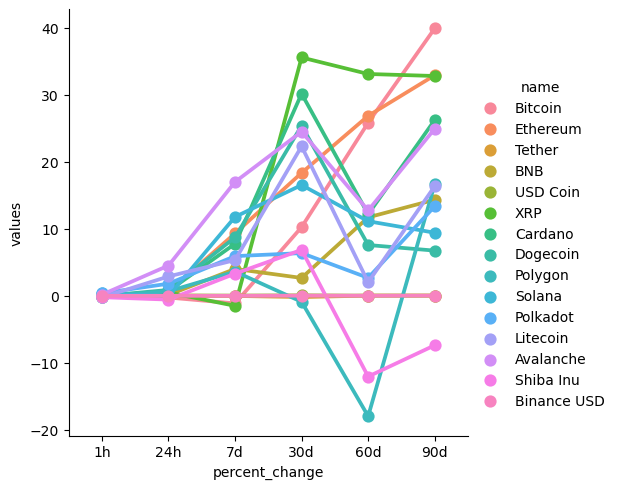

In [36]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [39]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29793.30052,2023-04-18 07:56:53.948344
0,Bitcoin,29793.30052,2023-04-18 07:56:59.513124
0,Bitcoin,29799.38421,2023-04-18 07:57:59.750394
0,Bitcoin,29789.32653,2023-04-18 07:59:00.257026


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

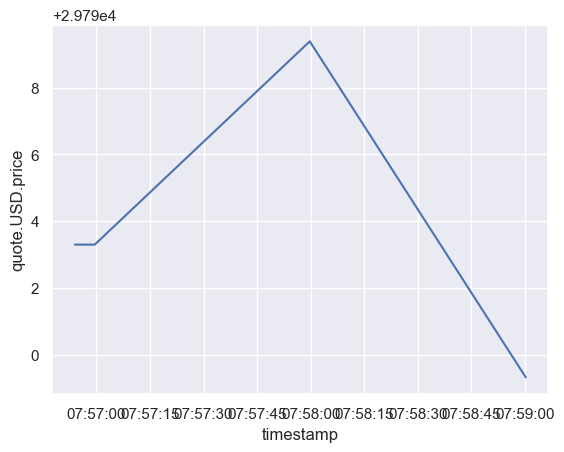

In [40]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
 